# Programming for Data Analysis - Project

For this project you must create a data set by simulating a real-world phenomenon of your choosing. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.

Specifically, in this project you should:
• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
• Investigate the types of variables involved, their likely distributions, and their relationships with each other.
• Synthesise/simulate a data set as closely matching their properties as possible.
• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

Note that this project is about simulation – you must synthesise a data set. Some students may already have some real-world data sets in their own files. It is okay to base your synthesised data set on these should you wish (please reference it if you do), but the main task in this project is to create a synthesised data set.


## Table of Contents

## Introduction

Proteins are complex molecules (macromolecules) responsible for performing a multitude of biological functions. These include keratin, collagen...

An important aspect in understanding how the protein structures relate to their molecular function..Structural biology, an umbrella term used to describe the application of experimental techniques such as X-ray and neutron crystallography and electron microscopy...

However, experimental techniques suffer from inherent drawbacks - they require highly-pure and stable physical samples that can be difficult to obtain in sufficient quantities, and human expertise to convert data to three-dimensional models that can be instinctively interpreted by human.

Computational biology approaches is one way to overcome these drawbacks. By making certain assumptions, we can use computers to solve structures. In order to judge the performance of various algorithms, CASP has been organized by the structural biology community as an open venue to learn from each other...

In this notebook, we will look at the distribtion....

In order to not reinvent the wheel, we will use pre-existing Python libraries to explore the dataset, and use the known relationships to generate a synthetic dataset.



In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib notebook
import pandas as pd
df = pd.read_csv("CASP.csv") # http://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure
import seaborn as sns

# to make interactive plots with plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
init_notebook_mode(connected=True)
from plotly import tools

We will first look at the data structure and make modifications as required.

In [3]:
df

RMSD        F1       F2       F3        F4            F5        F6  \
0      17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1       6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2       9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3      15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4       7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   
5       1.700   5117.30  1120.99  0.21905   51.6732  6.727227e+05   79.5911   
6       9.314   5924.16  1625.27  0.27434   70.2103  8.285145e+05   76.8064   
7       1.985   6882.15  1791.22  0.26027   77.2501  9.165165e+05   96.6785   
8       1.915  12090.00  4190.74  0.34662  129.0020  1.687508e+06  186.3090   
9       1.495   7400.24  1881.95  0.25430   82.9320  1.023846e+06  104.6970   
10     12.118   6556.77  1612.77  0.24597   71.6315  8.915443e+05   93.5329   
11      0.884   8828.21  2658.63  0.30115   90.8578  1.233384e+06  123.6860   
12      7.913   5637.37  2665.83  0.47288   49.8566  7.716355e+05   95.7431   
13     14.103   9021.10  3097.91  0.34340   98.1155  1.244160e+06  121.3480   
14      6.581  17572.20  5226.42  0.29742  227.7690  2.434431e+06  296.8000   
15      6.110  12330.60  4380.20  0.35523  195.9300  1.710155e+06  232.1540   
16      1.339   8478.55  2206.94  0.26029   91.5054  1.199770e+06  128.1660   
17      2.554   9147.09  2828.26  0.30919  104.0500  1.291447e+06  131.3580   
18      3.805   3905.51  1102.49  0.28229   34.2034  5.643988e+05   48.1646   
19     18.645  15620.90  5834.18  0.37348  153.4760  2.184645e+06  251.2250   
20      8.114  18679.00  5966.18  0.31940  179.7570  2.650897e+06  268.6610   
21     18.404  13605.50  4766.37  0.35032  139.7930  1.925985e+06  182.1950   
22     19.379   8693.56  3265.99  0.37567   55.4973  1.258363e+06  126.9280   
23     17.598   7727.36  1370.27  0.17732   77.5656  1.035614e+06  103.1770   
24     16.102   8865.32  3317.32  0.37419   95.8075  1.223688e+06  122.7480   
25     14.923   8259.29  2719.28  0.32923   76.1237  1.087133e+06  122.1430   
26      1.655   7136.22  2645.28  0.37068   64.1673  1.032920e+06   93.2759   
27      4.128   6922.15  2143.02  0.30958   63.6012  9.896310e+05   91.6472   
28      1.477   6449.78  1439.30  0.22315   74.7722  8.497845e+05   90.5322   
29      2.165  13274.30  3989.12  0.30051  169.7460  1.855448e+06  198.6440   
...       ...       ...      ...      ...       ...           ...       ...   
45700   0.966  23403.50  5511.79  0.23551  319.1290  3.224178e+06  407.9570   
45701   5.546  18403.60  4882.31  0.26529  245.5710  2.559338e+06  294.5570   
45702   3.581  13696.00  4088.79  0.29853  145.3500  1.844331e+06  211.9420   
45703   1.661   6405.36  2182.59  0.34074   72.0344  8.836039e+05   92.7146   
45704  18.522  10840.30  5689.76  0.52487   85.2052  1.355167e+06  207.9200   
45705  18.875  11215.80  3814.74  0.34012  102.4110  1.537030e+06  179.7740   
45706  17.150   9779.31  3687.08  0.37702   82.2241  1.397476e+06  144.7080   
45707  13.678   6233.61   846.29  0.13576   52.7953  8.656223e+05   71.4992   
45708   4.758   6458.52  1380.97  0.21382   64.5865  8.980187e+05   72.4505   
45709   1.788   6226.42  1551.74  0.24921   67.6087  8.793935e+05   74.1427   
45710   3.509  13867.40  4320.27  0.31154  167.1120  1.923652e+06  216.2990   
45711   1.572   8716.67  2369.97  0.27188   83.0696  1.222297e+06  116.8790   
45712   8.221   9893.75  2426.80  0.24528   87.7843  1.396274e+06  124.5970   
45713  12.684   7353.75  2471.99  0.33615   50.5474  1.047082e+06  107.5370   
45714  17.180   9616.40  3410.33  0.35463   99.8179  1.353932e+06  150.5450   
45715   0.984   9725.16  1990.64  0.20468  104.3870  1.372349e+06  138.4390   
45716   3.619  10153.40  3390.35  0.33391   83.1698  1.410026e+06  154.4500   
45717  13.697   6074.87  1322.94  0.21777   56.0178  8.186789e+05   70.0644   
45718  11.283   3781.01  1149.39  0.30399   36.0219  5.1284

From above, we can determine that we have 10 columns (RMSD and F1-F9) of 45730 rows (data points) each. Except for the first column, the others are non-descriptive and should be renamed so avoid confusion later on.

In [2]:
# rename columns based on information from the UCI webpage
# F1 - Total surface area. 
# F2 - Non polar exposed area. 
# F3 - Fractional area of exposed non polar residue. 
# F4 - Fractional area of exposed non polar part of residue. 
# F5 - Molecular mass weighted exposed area. 
# F6 - Average deviation from standard exposed area of residue. 
# F7 - Euclidian distance. 
# F8 - Secondary structure penalty. 
# F9 - Spacial Distribution constraints (N,K Value).
df.rename(columns={'F1': 'Total surface area',
                   'F2': 'Non-polar exposed area',
                   'F3': 'Fractional area of exposed non polar residue',
                   'F4': 'Fractional area of exposed non polar part of residue',
                   'F5': 'Molecular mass weighted exposed area',
                   'F6': 'Average deviation from standard exposed area of residue',
                   'F7': 'Euclidian distance',
                   'F8': 'Secondary structure penalty',
                   'F9': 'Spacial Distribution constraints (N,K Value)'
                  }, inplace = True)

df.corr() # calculate correlation between variables

RMSD  \
RMSD                                                1.000000   
Total surface area                                 -0.015087   
Non-polar exposed area                              0.156895   
Fractional area of exposed non polar residue        0.374309   
Fractional area of exposed non polar part of re... -0.169771   
Molecular mass weighted exposed area               -0.013982   
Average deviation from standard exposed area of... -0.036135   
Euclidian distance                                 -0.003339   
Secondary structure penalty                         0.000344   
Spacial Distribution constraints (N,K Value)        0.062830   

                                                    Total surface area  \
RMSD                                                         -0.015087   
Total surface area                                            1.000000   
Non-polar exposed area                                        0.906606   
Fractional area of exposed non polar residue                  0.126285   
Fractional area of exposed non polar part of re...            0.931056   
Molecular mass weighted exposed area                          0.998185   
Average deviation from standard exposed area of...            0.967531   
Euclidian distance                                            0.554002   
Secondary structure penalty                                   0.651251   
Spacial Distribution constraints (N,K Value)                 -0.898240   

                                                    Non-polar exposed area  \
RMSD                                                              0.156895   
Total surface area                                                0.906606   
Non-polar exposed area                                            1.000000   
Fractional area of exposed non polar residue                      0.502562   
Fractional area of exposed non polar part of re...                0.793143   
Molecular mass weighted exposed area                              0.902853   
Average deviation from standard exposed area of...                0.908354   
Euclidian distance                                                0.515929   
Secondary structure penalty                                       0.584242   
Spacial Distribution constraints (N,K Value)                     -0.786188   

                                                    Fractional area of exposed non polar residue  \
RMSD                                                                                    0.374309   
Total surface area                                                                      0.126285   
Non-polar exposed area                                                                  0.502562   
Fractional area of exposed non polar residue                                            1.000000   
Fractional area of exposed non polar part of re...                                      0.031230   
Molecular mass weighted exposed area                                                    0.122622   
Average deviation from standard exposed area of...                                      0.200650   
Euclidian distance                                                                      0.080064   
Secondary structure penalty                                                             0.095340   
Spacial Distribution constraints (N,K Value)                                           -0.069039   

                                                    Fractional area of exposed non polar part of residue  \
RMSD                                                                                        -0.169771      
Total surface area                                                                           0.931056      
Non-polar exposed area                                                                       0.793143      
Fractional area of exposed non polar residue                                                 0.031230      
Fractional area of exposed non polar

The table above shows the correlation coefficents between two variables for all the variables. However, it is too 'numerical' for a good interpretation. A better option is to use Seaborn to construct a heat map.



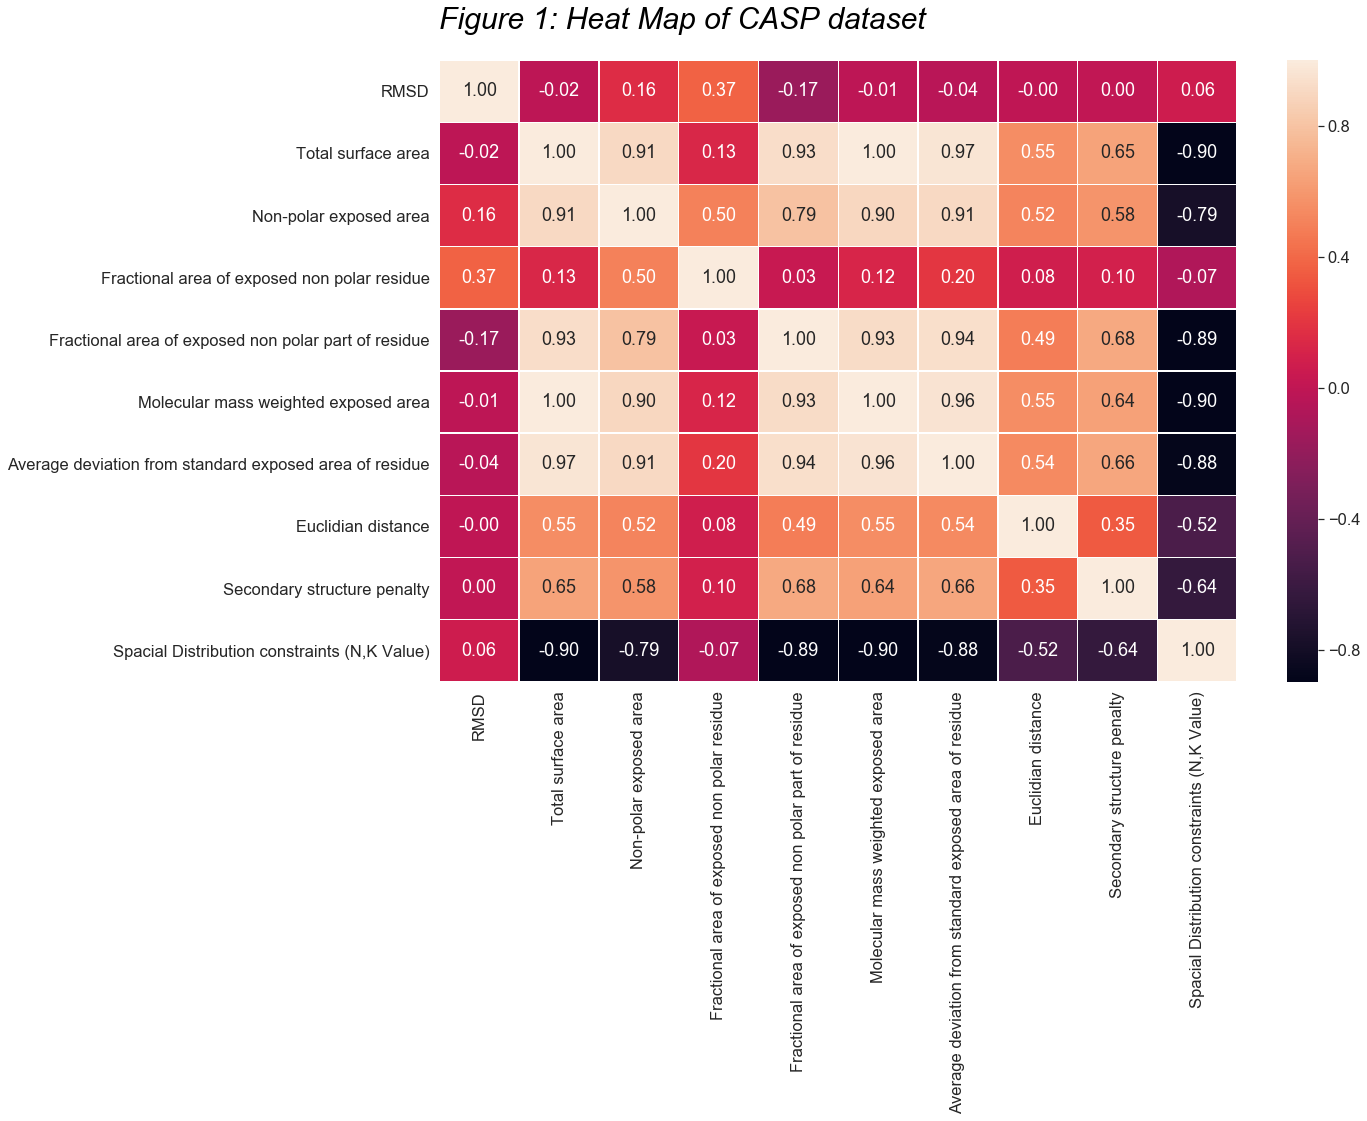

In [5]:
sns.set(font_scale=1.5)
plt.figure(figsize=(15,15)) 
plt.text(0,-0.5, "Figure 1: Heat Map of CASP dataset", fontsize = 30, color='Black', fontstyle='italic')
plt.tight_layout()

# according to the docs https://seaborn.pydata.org/generated/seaborn.heatmap.html and
# http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
# we can use linewidths to create some spacing between the cells and
# fmt (format) to round 2 decimal points
sns.heatmap(df.corr(), annot=True, linewidths = 0.5, fmt='.2f')

We can make the following observations:

1. RMSD is poorly correlated with any of the other variables.
1. There is a strong positive correlation between Total surface area and non-polar exposed area, Fractional area of exposed non-polar part of residue, Molecular mass weighted exposed area, Average deviation from standard exposed area of residue, and strong negative correlation with spatial distribution constraints.
1. With the exception of RMSD and Fractional area of exposed non-polar residue, all variables have strong correlation with the spatial distribution constraints.

Based on the variable labels and the correlation coefficients above, it seems likely that some variables could be collinear, rather than truly correlated. A multivariate analysis using the `pairplot()` function can shed some light here.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\matplotlib\tight_layout.py:199: UserWarning:

Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations



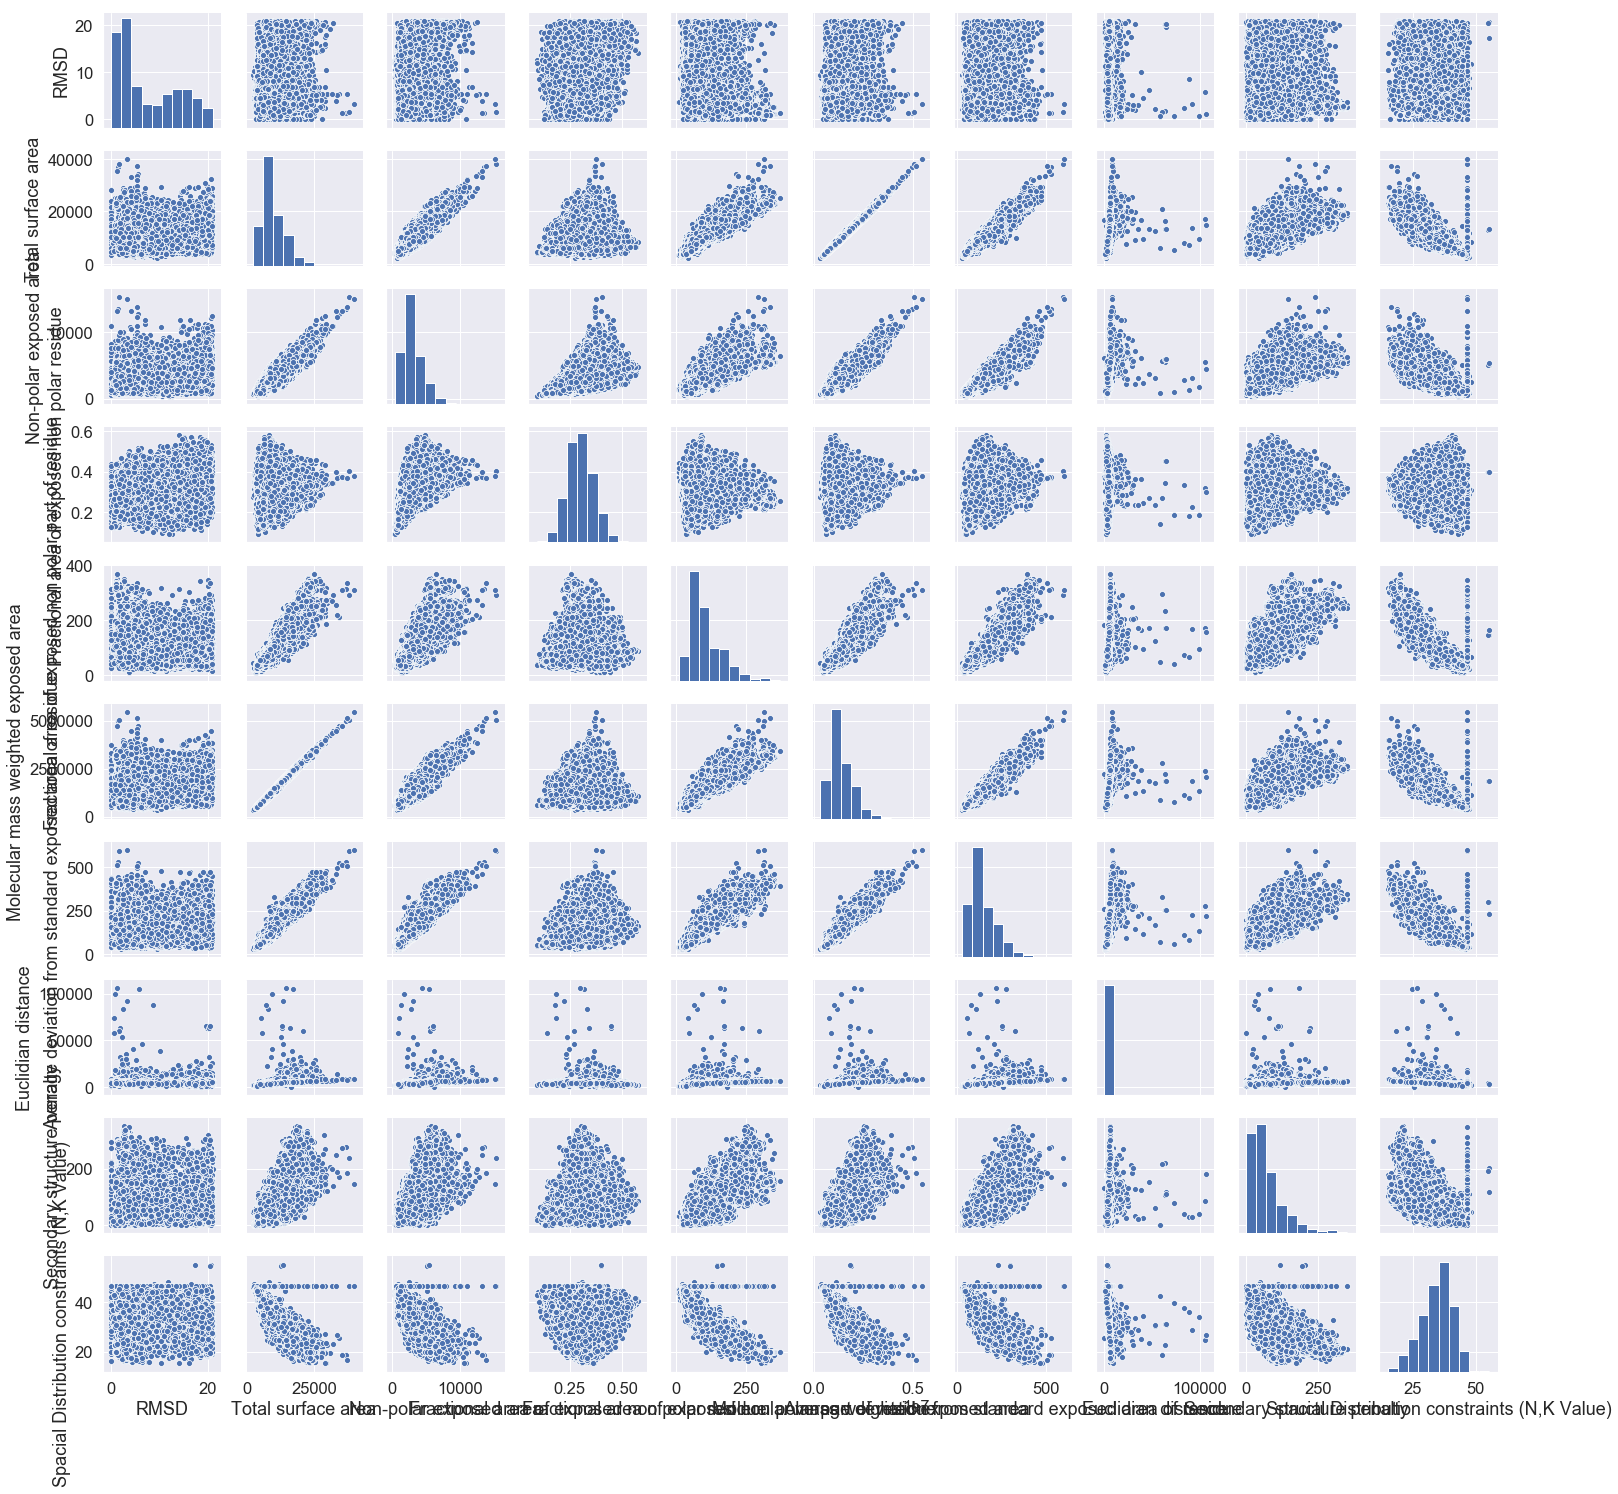

In [6]:
sns.pairplot(df)

It could be caused by the calculations used to determine the total surface area, which presumably is a function of xx and yy (addition).

In any case, we should look at the distribution of each variable. Scipy comes with many well-known distributions PDF, which each function takes usually two parameters - scale to control xx and loc to control mean.

While we could manually fit each distribution for each variable, we can use the `fitter` module to automatically generate the curves for us. In essence, `fitter` uses Scipy curve_fit to do xx and yy...

Let's fit the RMSD first

In [16]:
# https://pypi.org/project/fitter/
from scipy import stats 
from fitter import Fitter

RMSD_values = df['RMSD'] # get all RMSD values

f_RMSD = Fitter(RMSD_values)
f_RMSD.fit()

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\fitter\fitter.py:144: VisibleDeprecationWarning:

Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning:

invalid value encountered in double_scalars



Fitted alpha distribution with error=0.08421849856291073)
Fitted anglit distribution with error=0.19268318371304236)
Fitted arcsine distribution with error=0.24247688142304033)
Fitted argus distribution with error=0.22155219998885542)
Fitted beta distribution with error=0.16191152147489385)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:589: RuntimeWarning:

divide by zero encountered in true_divide

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:593: RuntimeWarning:

divide by zero encountered in true_divide

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1037: RuntimeWarning:

invalid value encountered in subtract



Fitted betaprime distribution with error=0.10465499096370028)
Fitted bradford distribution with error=0.13687332076021247)
Fitted burr distribution with error=0.12564205332488165)
Fitted burr12 distribution with error=0.1101014861057981)
Fitted cauchy distribution with error=0.15401670458719346)
Fitted chi distribution with error=0.1257240749683678)
Fitted chi2 distribution with error=0.7336450327611833)
Fitted cosine distribution with error=0.19518516551679505)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:6428: RuntimeWarning:

overflow encountered in power

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:6428: RuntimeWarning:

invalid value encountered in multiply



Fitted crystalball distribution with error=0.19741875987485566)
Fitted dgamma distribution with error=0.15292371355877094)
Fitted dweibull distribution with error=0.13417303205055886)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 12.600000000000001.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 12.400000000000002.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 11.666666666666668.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 12.366666666666667.

E:\Program Files (x86)\M

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 1.441742914285139.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 1.3719975002324631.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 1.297861596071248.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2562: RuntimeWarning:

The shape parameter of the erlang distribution has been given a non-integer value 1.4040269518004342.

E:\Program Files (x86)\Mic

Fitted erlang distribution with error=0.10442593858786538)
Fitted expon distribution with error=0.11801547213859427)
Fitted exponnorm distribution with error=0.07132523696220493)
Fitted exponpow distribution with error=0.1287610959889153)
Fitted exponweib distribution with error=0.1250471758740777)
Fitted f distribution with error=0.2379033922124224)
Fitted fatiguelife distribution with error=0.07623983639822411)
Fitted fisk distribution with error=0.0903936912590437)
Fitted foldcauchy distribution with error=0.10892310706499621)
Fitted foldnorm distribution with error=0.1281219452229234)
Fitted frechet_l distribution with error=1.3656803169677871)
Fitted frechet_r distribution with error=0.29343392505043825)
Fitted gamma distribution with error=0.10442667352984937)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:3080: RuntimeWarning:

divide by zero encountered in power



Fitted gausshyper distribution with error=0.10689435013178003)
Fitted genexpon distribution with error=0.09181931005660063)
Fitted genextreme distribution with error=0.08310572050320607)
Fitted gengamma distribution with error=0.11976535693163576)
Fitted genhalflogistic distribution with error=0.14065774605943063)
Fitted genlogistic distribution with error=0.16437428985796518)
Fitted gennorm distribution with error=0.1636815644777222)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:2159: RuntimeWarning:

divide by zero encountered in true_divide



Fitted genpareto distribution with error=0.12739738143855223)
Fitted gilbrat distribution with error=0.07471011949933573)
Fitted gompertz distribution with error=0.12507523583977148)
Fitted gumbel_l distribution with error=0.21780594216452862)
Fitted gumbel_r distribution with error=0.16421027370357294)
Fitted halfcauchy distribution with error=0.11082861548840295)
Fitted halfgennorm distribution with error=0.20546693086205065)
Fitted halflogistic distribution with error=0.12056602421568154)
Fitted halfnorm distribution with error=0.12616820527785969)
Fitted hypsecant distribution with error=0.19734469430005933)
Fitted invgamma distribution with error=0.08618787180466449)
Fitted invgauss distribution with error=0.07864437017017649)
Fitted invweibull distribution with error=0.08310424766729294)
Fitted johnsonsb distribution with error=0.09794909601851795)
Fitted johnsonsu distribution with error=0.08234493946356634)
Fitted kappa3 distribution with error=0.15684604439994543)
Fitted kappa

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning:

The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:44: RuntimeWarning:

floating point number truncated to an integer



SKIPPED ksone distribution (taking more than 30 seconds)
Fitted kstwobign distribution with error=0.16060621814422518)
Fitted laplace distribution with error=0.1808040682733676)
Fitted levy distribution with error=0.10306350982861189)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning:

divide by zero encountered in log



Fitted levy_l distribution with error=0.28280794285291555)
SKIPPED levy_stable distribution (taking more than 30 seconds)
Fitted loggamma distribution with error=0.19508114520105238)
Fitted logistic distribution with error=0.198377203907447)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:3785: RuntimeWarning:

divide by zero encountered in true_divide



Fitted loglaplace distribution with error=0.42100889880628756)
Fitted lognorm distribution with error=0.08394356675609117)
Fitted lomax distribution with error=0.12515955338342902)
Fitted maxwell distribution with error=0.18360118061126432)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning:

Extremely bad integrand behavior occurs at some points of the
  integration interval.

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning:

The integral is probably divergent, or slowly convergent.



Fitted mielke distribution with error=0.13650160469778833)
Fitted moyal distribution with error=0.14407891031741737)
Fitted nakagami distribution with error=0.12794702621546575)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_distn_infrastructure.py:1615: RuntimeWarning:

invalid value encountered in log



SKIPPED ncf distribution (taking more than 30 seconds)
SKIPPED nct distribution (taking more than 30 seconds)
SKIPPED ncx2 distribution (taking more than 30 seconds)
Fitted norm distribution with error=0.19741876036069558)
Fitted norminvgauss distribution with error=0.078600456037662)
Fitted pareto distribution with error=0.1291760278961276)
Fitted pearson3 distribution with error=0.10442601323294506)
Fitted powerlaw distribution with error=0.15044985251336704)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5166: RuntimeWarning:

divide by zero encountered in power

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5166: RuntimeWarning:

overflow encountered in power

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5166: RuntimeWarning:

invalid value encountered in multiply



Fitted powerlognorm distribution with error=0.08724609919431141)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5203: RuntimeWarning:

divide by zero encountered in power

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5203: RuntimeWarning:

invalid value encountered in multiply



Fitted powernorm distribution with error=nan)
Fitted rayleigh distribution with error=0.17708539871647114)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5250: RuntimeWarning:

divide by zero encountered in power



Fitted rdist distribution with error=0.16779286495972145)
Fitted recipinvgauss distribution with error=0.08291647159884365)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5358: RuntimeWarning:

invalid value encountered in log



Fitted reciprocal distribution with error=0.4438987678176207)
Fitted rice distribution with error=0.17708452018823492)
SKIPPED rv_continuous distribution (taking more than 30 seconds)
SKIPPED rv_histogram distribution (taking more than 30 seconds)
Fitted semicircular distribution with error=0.18761658480497542)
Fitted skewnorm distribution with error=0.1157785821033895)
Fitted t distribution with error=0.19743126778507877)
Fitted trapz distribution with error=0.29371455868987306)
Fitted triang distribution with error=0.10753843042626257)
Fitted truncexpon distribution with error=0.13335701067392597)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning:

divide by zero encountered in log

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5823: RuntimeWarning:

invalid value encountered in log



Fitted truncnorm distribution with error=0.19741876030997893)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\stats\_continuous_distns.py:5883: RuntimeWarning:

divide by zero encountered in power



SKIPPED tukeylambda distribution (taking more than 30 seconds)
Fitted uniform distribution with error=0.16896859110142204)
Fitted vonmises distribution with error=1.906640606105756e+53)
Fitted vonmises_line distribution with error=0.16899065486588113)
Fitted wald distribution with error=0.07172441553021672)
Fitted weibull_max distribution with error=1.3656803169677871)
Fitted weibull_min distribution with error=0.29343392505043825)
Fitted wrapcauchy distribution with error=nan)


E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\scipy\optimize\optimize.py:563: RuntimeWarning:

invalid value encountered in subtract

E:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning:

invalid value encountered in reduce



sumsquare_error
exponnorm            0.071325
wald                 0.071724
gilbrat              0.074710
fatiguelife          0.076240
norminvgauss         0.078600

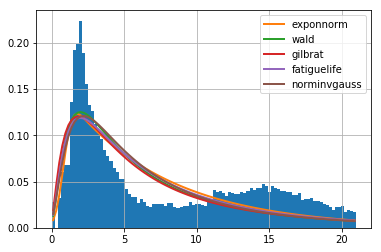

In [19]:
f_RMSD.summary()

It seems the distribution for RMSD is not really fittable by fitter using the default bin size. Let's see if increasing the bins changes anything.

In [12]:
# f = Fitter(data, bins=200, xmin=7.5)
f_RMSD = Fitter(RMSD_values, bins = 1000) # can pass xmin = 7.5 if needed
f_RMSD.fit()

Fitted alpha distribution with error=0.978940106298237)
Fitted anglit distribution with error=2.0625438463470362)
Fitted arcsine distribution with error=2.8564174236247464)
Fitted argus distribution with error=2.3512602454268454)
Fitted beta distribution with error=1.7522429360651657)
Fitted betaprime distribution with error=1.1892966444659803)
Fitted bradford distribution with error=1.5037334959006985)
Fitted burr distribution with error=1.3863614200085221)
Fitted burr12 distribution with error=1.243194696407566)
Fitted cauchy distribution with error=1.6764421910743326)
Fitted chi distribution with error=1.3889870974745504)
Fitted chi2 distribution with error=8.412599889255244)
Fitted cosine distribution with error=2.0875971355656793)
Fitted crystalball distribution with error=2.109974693729211)
Fitted dgamma distribution with error=1.6653267309867719)
Fitted dweibull distribution with error=1.4776339383629558)
Fitted erlang distribution with error=1.1870532885837508)
Fitted expon dis

sumsquare_error
exponnorm            0.848019
wald                 0.854495
gilbrat              0.886847
fatiguelife          0.900127
norminvgauss         0.923258

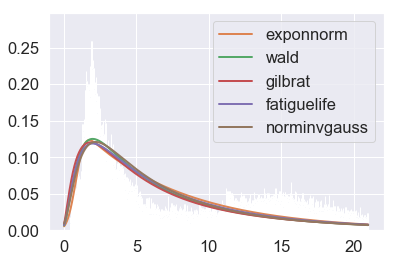

In [13]:
f_RMSD.summary()

It seems that automatic fitting is not working. More likely, this is a bimodal distribution.

[ 11.8673043    9.8654873  174.8974267    2.16108056   0.87748361
 798.68105068] 
 [ 0.8099839   1.69396005  8.40581335  0.02836555  0.03816138 26.6748341 ]


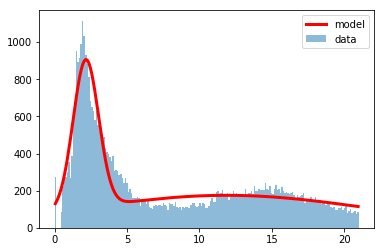

In [17]:
from pylab import *
from scipy.optimize import curve_fit

# https://stackoverflow.com/questions/37559470/what-do-all-the-distributions-available-in-scipy-stats-look-like

# https://stackoverflow.com/questions/35990467/fit-two-gaussians-to-a-histogram-from-one-set-of-data-python

# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html
# hist() returns a tuple, with the last element being a silent list of patches, so we assign this to special variable '_'
# https://hackernoon.com/understanding-the-underscore-of-python-309d1a029edc
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.diag.html

y, x, _ = hist(df['RMSD'], 200, alpha = 0.5, label = 'data')

x=(x[1:]+x[:-1])/2 # for len(x)==len(y)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

#expected=(1,.2,250,2,.2,125)
# expected=(5,.2,1,20,.5,1) # initial estimate for non-linear least square
expected=(15, 9, 150, 2, 0.5, 800)
# curve_fit returns popt (array of optimal params) and pcov (array of est covariance of popt)
params,cov=curve_fit(bimodal,x,y,expected)
sigma=sqrt(diag(cov))
plot(x,bimodal(x,*params),color='red',lw=3,label='model')
legend()
print(params,'\n',sigma) 

From the output above, we obtain two normal distributions that is relatively a good approximation of the RMSD data.

| Distr. | u | sigma | A
| --- | --- | --- | -- |
| Normal1 | 11.8673043 | 9.8654873 | 174.8974267 |
| Normal2 | 2.16108056 | 0.87748361 | 798.68105068 |

However, simulating a dataset following a bimodal normal distribution is tricky with `numpy.random` but doable (ref)[https://stackoverflow.com/questions/4265988/generate-random-numbers-with-a-given-numerical-distribution]. In addition, we can also see that the model curve does not properly follow the experimental distribution.

A better alternative is to perform (inverse transform sampling)[http://www.nehalemlabs.net/prototype/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/].

1. Inverse transform sampling, in essence, is a method to rescale a uniform random variable (which is what numpy.random returns - see the Programming for Data Analysis Assignment) into a desired probability distribution.
1. 




In [12]:
# http://www.nehalemlabs.net/prototype/blog/2013/12/16/how-to-do-inverse-transformation-sampling-in-scipy-and-numpy/


import scipy.interpolate as interpolate

def inverse_transform_sampling(data, n_bins=200, n_samples=40000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interpolate.interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

test_inverse = inverse_transform_sampling(df['RMSD'])

In [24]:
# https://plot.ly/python/histograms/

trace_experimental = go.Histogram(x = df['RMSD'], opacity= 0.75, name = 'experimental')

trace_synthetic = go.Histogram(x = test_inverse, opacity= 0.5, name = 'synthetic', marker = dict(color = 'yellow'))

data = [trace_experimental, trace_synthetic]
layout = go.Layout(barmode= 'overlay')

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [ ]:


data = df.iloc[:, 1]

f = Fitter(data, bins=200)
f.fit()
f.summary()


In [ ]:
f = Fitter(df.iloc[:, 2], bins=200)
f.fit()
f.summary()

In [ ]:
f = Fitter(df.iloc[:, 3], bins=200)
f.fit()
f.summary()

In [ ]:
f = Fitter(df.iloc[:, 4], bins=200)
f.fit()
f.summary()

In [ ]:
f = Fitter(df.iloc[:, 5], bins=200)
f.fit()
f.summary()

In [ ]:
f = Fitter(df.iloc[:, 6], bins=200)
f.fit()
f.summary()

In [ ]:
f = Fitter(df.iloc[:, 7], bins=200)
f.fit()
f.summary()

In [ ]:
f = Fitter(df.iloc[:, 8], bins=200)
f.fit()
f.summary()

In [ ]:
f = Fitter(df.iloc[:, 9], bins=200)
f.fit()
f.summary()

In [ ]:
trace0 = go.Histogram(x=df.iloc[:, 0])

data = [trace0]

fig = go.Figure(data=data)
iplot(fig)

## Discussion

## Conclusion